In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
df = pd.read_csv('[Final]Total_csv.csv',sep='\t')

NameError: name 'pd' is not defined

## Data Extract

In [5]:
# best feature 추출
best_df = df[['Question_count','First_ratio','Second_ratio','Tag_count','pos_ratio',
 'neg_ratio','subjectivity','polarity','senti_diffs_per_ref','Sticker_count','Text_len','Count_space_mistake',
   'effort_ratio','effort_img_ratio','Left','Center','Right','Justify',
   'img img img img img','img img img img text','img img img text img','img img text img img','img img text img text',
 'img text img img img','img text img img text','img text img text img','text img img img img','text img img img text',
 'text img img text img','text img text img img','text img text img text','Credibility']]

print ("before: ", best_df.shape)
best_df = best_df.dropna()
print ("after: ", best_df.shape)

NameError: name 'df' is not defined

## Data shuffling

In [4]:
from sklearn.utils import shuffle
best_df = shuffle(best_df)

In [5]:
Credibility = best_df[best_df['Credibility']==1]
Non_credibility = best_df[best_df['Credibility']==0]

In [6]:
from sklearn.utils import shuffle
Credibility = shuffle(Credibility)
Non_credibility = shuffle(Non_credibility)
print ("credible: ", Credibility.shape)
print ("non: ",Non_credibility.shape)

train_credibility = Credibility[:6000]
train_non_credibility = Non_credibility[:6000]
print ("credible: ", train_credibility.shape)
print ("non: ", train_non_credibility.shape)

test_cred = Credibility[6000:6289]
test_non_cred = Non_credibility[6000:6289]
print ("credible: ", test_cred.shape)
print ("non: ", test_non_cred.shape)

df_test_total = pd.concat([test_cred, test_non_cred], axis = 0)
print ("shape: ", df_test_total.shape)
df_test_total.sample(10)

credible:  (9924, 32)
non:  (6289, 32)
credible:  (6000, 32)
non:  (6000, 32)
credible:  (289, 32)
non:  (289, 32)
shape:  (578, 32)


,Question_count,First_ratio,Second_ratio,Tag_count,pos_ratio,neg_ratio,subjectivity,polarity,senti_diffs_per_ref,Sticker_count,...,img img text img text,img text img img img,img text img img text,img text img text img,text img img img img,text img img img text,text img img text img,text img text img img,text img text img text,Credibility
10055,4,0.002387,0.0,2,1.030928e-02,1.546392e-02,2.577320e-02,2.000000e-01,-5.154639e-03,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,1
8153,0,0.000000,0.0,7,1.818182e-02,0.000000e+00,1.818182e-02,-1.000000e+00,1.818182e-02,0.0,...,0.000000,0.076096,0.000000,0.000000,0.084360,0.0000,0.063104,0.000000,0.000000,1
8198,0,0.000000,0.0,1,3.187614e-02,3.369763e-02,6.557377e-02,2.777778e-02,-1.821494e-03,0.0,...,0.000000,0.000000,0.000000,0.694297,0.000000,0.0000,0.000000,0.000000,0.719689,1
2772,0,0.000000,0.0,3,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,1.000000e-09,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,1
7052,0,0.003571,0.0,2,1.282051e-02,0.000000e+00,1.282051e-02,-1.000000e+00,1.282051e-02,0.0,...,0.000000,0.000000,0.000000,0.624379,0.000000,0.0000,0.000000,0.000000,0.781121,0
1475,5,0.002999,0.0,0,2.711864e-02,4.745763e-02,7.457627e-02,2.727273e-01,-2.033898e-02,0.0,...,0.000000,0.000000,0.000000,0.639871,0.000000,0.0000,0.000000,0.000000,0.768482,1
7740,1,0.001453,0.0,5,4.347826e-02,2.173913e-02,6.521739e-02,-3.333333e-01,2.173913e-02,0.0,...,0.000000,0.000000,0.000000,0.624379,0.000000,0.0000,0.000000,0.000000,0.781121,0
1172,4,0.000000,0.0,4,1.030928e-02,4.123711e-02,5.154639e-02,6.000000e-01,-3.092784e-02,0.0,...,0.000000,0.000000,0.000000,0.706814,0.000000,0.0000,0.000000,0.000000,0.707400,1
13991,4,0.002005,0.0,10,3.550296e-02,4.733728e-02,8.284024e-02,1.428571e-01,-1.183432e-02,0.0,...,0.265452,0.000000,0.256770,0.643344,0.000000,0.0000,0.271904,0.241600,0.563392,0
12699,3,0.000723,0.0,8,2.814570e-02,2.980132e-02,5.794702e-02,2.857143e-02,-1.655629e-03,0.0,...,0.161961,0.400109,0.261106,0.130841,0.147852,0.3172,0.276495,0.147408,0.049106,1


In [3]:
df_train_total = pd.concat([train_credibility, train_non_credibility])
print ("shape: ", df_train_total.shape)

NameError: name 'pd' is not defined

In [8]:
from sklearn.utils import shuffle
df_train_total = shuffle(df_train_total)
df_test_total = shuffle(df_test_total)
df_train_total = df_train_total.reset_index(drop=True)
df_test_total = df_test_total.reset_index(drop=True)
df_train_total.head(10)

,Question_count,First_ratio,Second_ratio,Tag_count,pos_ratio,neg_ratio,subjectivity,polarity,senti_diffs_per_ref,Sticker_count,...,img img text img text,img text img img img,img text img img text,img text img text img,text img img img img,text img img img text,text img img text img,text img text img img,text img text img text,Credibility
0,1,0.000000,0.000000,6,0.037037,0.000000,0.037037,-1.000000,0.037037,0.0,...,0.095508,0.000000,0.092384,0.694412,0.000000,0.0,0.097829,0.086926,0.694988,1
1,0,0.000000,0.002339,0,0.024096,0.030120,0.054217,0.111111,-0.006024,0.0,...,0.217905,0.269156,0.421555,0.264054,0.298384,0.0,0.446401,0.396650,0.132136,0
2,3,0.000000,0.000000,3,0.041667,0.041667,0.083333,0.000000,0.000000,0.0,...,0.599327,0.000000,0.000000,0.363128,0.000000,0.0,0.613892,0.000000,0.363429,1
3,0,0.000000,0.000000,4,0.026549,0.035398,0.061947,0.142857,-0.008850,0.0,...,0.000000,0.000000,0.000000,0.706814,0.000000,0.0,0.000000,0.000000,0.707400,1
4,10,0.001925,0.000000,10,0.058594,0.046875,0.105469,-0.111111,0.011719,0.0,...,0.000000,0.000000,0.000000,0.650481,0.000000,0.0,0.000000,0.000000,0.759523,0
5,0,0.000000,0.000000,6,0.025641,0.032051,0.057692,0.111111,-0.006410,0.0,...,0.000000,0.000000,0.000000,0.639871,0.000000,0.0,0.000000,0.000000,0.768482,0
6,0,0.000000,0.000000,2,0.027295,0.047146,0.074442,0.266667,-0.019851,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1
7,0,0.001721,0.002295,2,0.041176,0.026471,0.067647,-0.217391,0.014706,0.0,...,0.000000,0.000000,0.000000,0.664056,0.000000,0.0,0.000000,0.000000,0.747683,0
8,2,0.001847,0.000000,6,0.038889,0.094444,0.133333,0.416667,-0.055556,0.0,...,0.125656,0.000000,0.121546,0.685206,0.000000,0.0,0.128709,0.114365,0.685773,0
9,1,0.000000,0.000000,4,0.035000,0.025000,0.060000,-0.166667,0.010000,0.0,...,0.000000,0.000000,0.000000,0.706814,0.000000,0.0,0.000000,0.000000,0.707400,0


# x,y selection

In [4]:
x = df_train_total.drop(columns=['Credibility'])
y = df_train_total[['Credibility']]

NameError: name 'df_train_total' is not defined

# K-means Clustering 

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle

def k_means_clustering(data, num):
    scaler = StandardScaler()
    model = KMeans(init="k-means++", n_clusters=num, random_state=42)
    pipeline = make_pipeline(scaler, model)
    pipeline.fit(data)
    
#Clustering model pickle 저장
#     with open("8-means.pkl","wb") as handle:
#         pickle.dump(pipeline,handle)
    
#load the content
# pipeline = pickle.load(open("5-means(0,1,2,3).pkl", "rb" ) )    

    predict_class = pd.DataFrame(pipeline.predict(data))
    predict_class.columns = ['class']
    return predict_class

def create_cross_table(y, predict_class):
    cross_table = pd.crosstab(y['Credibility'], predict_class['class'])
    cross_table.loc['total'] = cross_table.select_dtypes(pd.np.number).sum()
    cross_table.iloc[0] = cross_table.iloc[0] / cross_table.iloc[2]
    cross_table.iloc[1] = cross_table.iloc[1] / cross_table.iloc[2]
    
    # over 60 detect
    list_class = []
    list_credible = []

    for i in range(2): # credible
        for j in range(len(cross_table.iloc[i])): # class
            if cross_table.iloc[i][j] >= 0.6:
                list_credible.append(i)
                list_class.append(j)

    over60_zip = list(zip(list_class, list_credible))
    over60_zip.sort(key = lambda x: x[0])
    print ("한 쪽이 60% 넘는 총 개수는 {0} 개".format(len(over60_zip)))
    for i in range(len(over60_zip)):
        print ("60%가 넘는 것은 class: {0}, credibility: {1} 일 때 입니다. ".format(over60_zip[i][0], over60_zip[i][1]))    
    return cross_table

# Clusteing Result

In [11]:
predict_feature_all_8 = k_means_clustering(x, 8)
ct8 = create_cross_table(y, predict_feature_all_8)
ct8

한 쪽이 60% 넘는 총 개수는 6 개
60%가 넘는 것은 class: 1, credibility: 0 일 때 입니다. 
60%가 넘는 것은 class: 2, credibility: 1 일 때 입니다. 
60%가 넘는 것은 class: 3, credibility: 0 일 때 입니다. 
60%가 넘는 것은 class: 4, credibility: 0 일 때 입니다. 
60%가 넘는 것은 class: 5, credibility: 1 일 때 입니다. 
60%가 넘는 것은 class: 6, credibility: 1 일 때 입니다. 


class,0,1,2,3,4,5,6,7
Credibility,,,,,,,,
0,0.598365,0.625804,0.334919,1.0,1.0,0.034058,0.256378,0.550287
1,0.401635,0.374196,0.665081,0.0,0.0,0.965942,0.743622,0.449713
total,1713.000000,6371.000000,1051.000000,4.0,1.0,1380.000000,784.000000,696.000000


# Elbow method

In [ ]:
ks = range(1,30)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x)
    inertias.append(model.inertia_)

# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# 각 Group 비교하기

In [12]:
col_name = x.columns.tolist()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_x = scaler.transform(x)
scaled_x_df = pd.DataFrame(scaled_x)
scaled_x_df.columns = col_name

# Python Radar chart - Structure

In [13]:
import matplotlib.pyplot as plt
from math import pi

In [14]:
scaled_x_structure = scaled_x_df[['img img img img img',
 'img img img img text',
 'img img img text img',
 'img img text img img',
 'img img text img text',
 'img text img img img',
 'img text img img text',
 'img text img text img',
 'text img img img img',
 'text img img img text',
 'text img img text img',
 'text img text img img',
 'text img text img text']]

In [15]:
df_analysis = pd.concat([scaled_x_structure,predict_feature_all_8,y],axis=1)

In [16]:
df_0 = df_analysis[df_analysis['class']==0]
df_1 = df_analysis[df_analysis['class']==1]
df_2 = df_analysis[df_analysis['class']==2]
df_5 = df_analysis[df_analysis['class']==5]
df_6 = df_analysis[df_analysis['class']==6]
df_7 = df_analysis[df_analysis['class']==7]

In [17]:
df_0 = df_0.drop(columns=['Credibility','class'])
df_1 = df_1.drop(columns=['Credibility','class'])
df_2 = df_2.drop(columns=['Credibility','class'])
df_5 = df_5.drop(columns=['Credibility','class'])
df_6 = df_6.drop(columns=['Credibility','class'])
df_7 = df_7.drop(columns=['Credibility','class'])

In [18]:
df_0_mean = df_0.describe().iloc[1]
df_1_mean = df_1.describe().iloc[1]
df_2_mean = df_2.describe().iloc[1]
df_5_mean = df_5.describe().iloc[1]
df_6_mean = df_6.describe().iloc[1]
df_7_mean = df_7.describe().iloc[1]

In [19]:
df_0 = pd.DataFrame(df_0_mean).T
df_1 = pd.DataFrame(df_1_mean).T
df_2 = pd.DataFrame(df_2_mean).T
df_5 = pd.DataFrame(df_5_mean).T
df_6 = pd.DataFrame(df_6_mean).T
df_7 = pd.DataFrame(df_7_mean).T

In [20]:
Total_df = pd.concat([df_0,df_1,df_2,df_5,df_6,df_7])

In [21]:
Total_df['class'] = [0,1,2,5,6,7]

In [22]:
labels = ('Factor 0', 'Factor 1', 'Factor 2', 'Factor 5', 'Factor 6', 'Factor 7')

Text(0.5,1.15,'Python Radar chart - Structure')

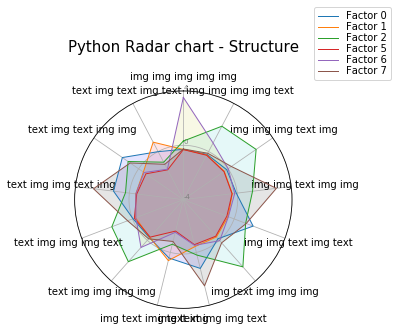

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# ------- PART 1: Create background
 
# number of variable
categories=list(Total_df)[:-1]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-4,0,4], ["-4","0","4"], color="grey", size=7)
plt.ylim(-4,4)
 
 
# # ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind0
values = Total_df.iloc[0].drop('class').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind1
values= Total_df.iloc[1].drop('class').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind2
values= Total_df.iloc[2].drop('class').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group C")
ax.fill(angles, values, 'c', alpha=0.1)

# Ind3
values= Total_df.iloc[3].drop('class').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group D")
ax.fill(angles, values, 'm', alpha=0.1)

# Ind4
values= Total_df.iloc[4].drop('class').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group E")
ax.fill(angles, values, 'y', alpha=0.1)

# Ind7
values= Total_df.iloc[5].drop('class').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group F")
ax.fill(angles, values, 'k', alpha=0.1)

legend = ax.legend(labels, loc=(0.9, .95),
                   labelspacing=0.1,bbox_to_anchor=(1.1, 1.05))
plt.title('Python Radar chart - Structure',position=(0.5,1.0+0.15),fontsize=15)

# Python Radar chart - Sentiment

In [44]:
scaled_x_sentiment = scaled_x_df[['pos_ratio',
 'neg_ratio',
 'subjectivity',
 'polarity',
 'senti_diffs_per_ref',]]

In [45]:
df_analysis = pd.concat([scaled_x_sentiment,predict_feature_all_8,y],axis=1)

In [46]:
df_0 = df_analysis[df_analysis['class']==0]
df_1 = df_analysis[df_analysis['class']==1]
df_2 = df_analysis[df_analysis['class']==2]
df_5 = df_analysis[df_analysis['class']==5]
df_6 = df_analysis[df_analysis['class']==6]
df_7 = df_analysis[df_analysis['class']==7]

In [47]:
df_0 = df_0.drop(columns=['Credibility','class'])
df_1 = df_1.drop(columns=['Credibility','class'])
df_2 = df_2.drop(columns=['Credibility','class'])
df_5 = df_5.drop(columns=['Credibility','class'])
df_6 = df_6.drop(columns=['Credibility','class'])
df_7 = df_7.drop(columns=['Credibility','class'])

In [48]:
df_0_mean = df_0.describe().iloc[1]
df_1_mean = df_1.describe().iloc[1]
df_2_mean = df_2.describe().iloc[1]
df_5_mean = df_5.describe().iloc[1]
df_6_mean = df_6.describe().iloc[1]
df_7_mean = df_7.describe().iloc[1]

In [49]:
df_0 = pd.DataFrame(df_0_mean).T
df_1 = pd.DataFrame(df_1_mean).T
df_2 = pd.DataFrame(df_2_mean).T
df_5 = pd.DataFrame(df_5_mean).T
df_6 = pd.DataFrame(df_6_mean).T
df_7 = pd.DataFrame(df_7_mean).T

In [50]:
Total_df = pd.concat([df_0,df_1,df_2,df_5,df_6,df_7])

In [51]:
Total_df['class'] = [0,1,2,5,6,7]

Text(0.5,1.15,'Python Radar chart - Sentiment')

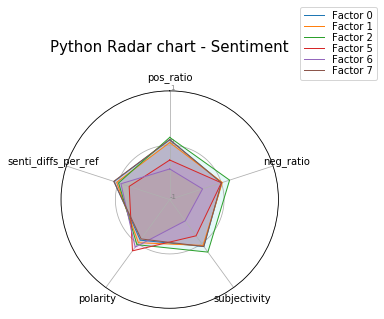

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# ------- PART 1: Create background
# number of variable
categories=list(Total_df)[:-1]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)

# Data의 자료 위치 명시
plt.yticks([-1,0,1], ["-1","0","1"], color="grey", size=7)
# Data의 최소값과 최대값 지정
plt.ylim(-1,1)
 
 
# # ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind0
values = Total_df.iloc[0].drop('class').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind1
values= Total_df.iloc[1].drop('class').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind2
values= Total_df.iloc[2].drop('class').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group C")
ax.fill(angles, values, 'c', alpha=0.1)

# Ind3
values= Total_df.iloc[3].drop('class').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group D")
ax.fill(angles, values, 'm', alpha=0.1)

# Ind4
values= Total_df.iloc[4].drop('class').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group E")
ax.fill(angles, values, 'y', alpha=0.1)

# Ind7
values= Total_df.iloc[5].drop('class').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group F")
ax.fill(angles, values, 'k', alpha=0.1)
legend = ax.legend(labels, loc=(0.9, .95),
                   labelspacing=0.1,bbox_to_anchor=(1.1, 1.05))
plt.title('Python Radar chart - Sentiment',position=(0.5,1.0+0.15),fontsize=15)

# Python Radar chart - Others

In [55]:
scaled_x_others = scaled_x_df[[
 'Question_count',
 'First_ratio',
 'Second_ratio',
 'Tag_count',
'Sticker_count',
 'Text_len',
 'Count_space_mistake',
 'effort_ratio',
 'effort_img_ratio',
 'Left',
 'Center',
 'Right',
 'Justify']]

In [56]:
df_analysis = pd.concat([scaled_x_others,predict_feature_all_8,y],axis=1)

In [57]:
df_0 = df_analysis[df_analysis['class']==0]
df_1 = df_analysis[df_analysis['class']==1]
df_2 = df_analysis[df_analysis['class']==2]
df_5 = df_analysis[df_analysis['class']==5]
df_6 = df_analysis[df_analysis['class']==6]
df_7 = df_analysis[df_analysis['class']==7]

In [58]:
df_0 = df_0.drop(columns=['Credibility','class'])
df_1 = df_1.drop(columns=['Credibility','class'])
df_2 = df_2.drop(columns=['Credibility','class'])
df_5 = df_5.drop(columns=['Credibility','class'])
df_6 = df_6.drop(columns=['Credibility','class'])
df_7 = df_7.drop(columns=['Credibility','class'])

In [59]:
df_0_mean = df_0.describe().iloc[1]
df_1_mean = df_1.describe().iloc[1]
df_2_mean = df_2.describe().iloc[1]
df_5_mean = df_5.describe().iloc[1]
df_6_mean = df_6.describe().iloc[1]
df_7_mean = df_7.describe().iloc[1]

In [60]:
df_0 = pd.DataFrame(df_0_mean).T
df_1 = pd.DataFrame(df_1_mean).T
df_2 = pd.DataFrame(df_2_mean).T
df_5 = pd.DataFrame(df_5_mean).T
df_6 = pd.DataFrame(df_6_mean).T
df_7 = pd.DataFrame(df_7_mean).T

In [61]:
Total_df = pd.concat([df_0,df_1,df_2,df_5,df_6,df_7])

In [62]:
Total_df['class'] = [0,1,2,5,6,7]

Text(0.5,1.15,'Python Radar chart - Others')

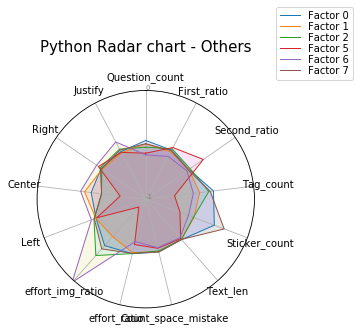

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
from math import pi
 
# ------- PART 1: Create background
 
# number of variable
categories=list(Total_df)[:-1]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)

# Data의 자료 위치 명시
plt.yticks([-1,1], ["-1","0","1"], color="grey", size=7)
# Data의 최소값과 최대값 지정
plt.ylim(-1,1)

 
# # ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind0
values = Total_df.iloc[0].drop('class').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind1
values= Total_df.iloc[1].drop('class').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)

# Ind2
values= Total_df.iloc[2].drop('class').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'c', alpha=0.1)

# Ind3
values= Total_df.iloc[3].drop('class').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'm', alpha=0.1)

# Ind4
values= Total_df.iloc[4].drop('class').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'y', alpha=0.1)

# Ind7
values= Total_df.iloc[5].drop('class').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'k', alpha=0.1)

legend = ax.legend(labels, loc=(0.9, .95),
                   labelspacing=0.1,bbox_to_anchor=(1.1, 1.05))
    
plt.title('Python Radar chart - Others',position=(0.5,1.0+0.15),fontsize=15)